Construct an interpolaiton polynomial for the function $ f(x) = \sin^3(x^2) $ with $\ π/6 $ and $\ π/5 $ with respective multiplicities 2 and 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../util/')

from hermite_poly import hermite_poly

> $ f(x) = \sin^3(x^2) $

$ f'(x) = 3\sin^2(x^2) \, (\sin(x^2))' $

$ f'(x) = 3\sin^2(x^2) \, (\cos(x^2)\, 2x) $

> $ f'(x) = 6x\sin^2(x^2)\cos(x^2) $

$ f''(x) = 6[\sin^2(x^2)\cos(x^2) + x(\sin^2(x^2)\cos(x^2))'] $

$ f''(x) = 6\{\sin^2(x^2)\cos(x^2) + x[2\sin(x^2) (\sin(x^2))' \cos(x^2) - \sin^2(x^2)\sin(x^2)\,2x]\} $

$ f''(x) = 6\{\sin^2(x^2)\cos(x^2) + x[2\sin(x^2) \cos(x^2)\,2x\,\cos(x^2) - \sin^2(x^2)\sin(x^2)\,2x]\} $

$ f''(x) = 6\{\sin^2(x^2)\cos(x^2) + x[4x\,\sin(x^2) \cos^2(x^2) - 2x\sin^2(x^2)\sin(x^2)]\} $

$ f''(x) = 6\{\sin^2(x^2)\cos(x^2) + 2x\sin(x^2)[2x\, \cos^2(x^2) - x\sin^2(x^2)]\} $

$ f''(x) = 6\sin(x^2)\{\sin(x^2)\cos(x^2) + 2x[2x\, \cos^2(x^2) - x\sin^2(x^2)]\} $

> $ f''(x) = 6\sin(x^2)\{\sin(x^2)\cos(x^2) + 4x^2\cos^2(x^2) - 2x^2\sin^2(x^2)\} $

In [3]:
f = lambda x: np.sin(x ** 2) ** 3

f_der1 = lambda x: 6 * x * np.cos(x ** 2) * (np.sin(x ** 2) ** 2)

f_der2 = lambda x: (
    6 * np.sin(x ** 2) * (np.sin(x ** 2) * np.cos(x ** 2) + 4 * (x ** 2) *
    (np.cos(x ** 2) ** 2) - 2 * (x ** 2) * (np.sin(x ** 2) ** 2))
)

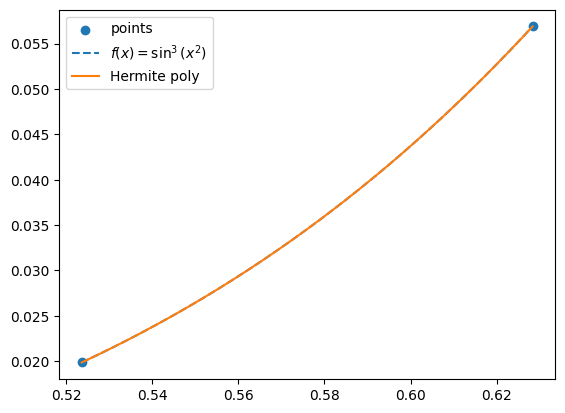

In [4]:
nodes = np.array([np.pi/6, np.pi/6, np.pi/5, np.pi/5, np.pi/5])
values = np.array([f(nodes[0]), f_der1(nodes[1]), f(nodes[2]), f_der1(nodes[3]), f_der2(nodes[4])])

x_axis = np.linspace(nodes.min(), nodes.max(), 300)

plt.scatter([np.pi/6, np.pi/5], [f(np.pi/6), f(np.pi/5)])
plt.plot(x_axis, f(x_axis), linestyle='dashed')
plt.plot(x_axis, hermite_poly(nodes, values, x_axis))
plt.legend(['points', '$f(x) = \\sin^3(x^2)$', 'Hermite poly'])
plt.show()